In [412]:
import csv 
import matplotlib.pyplot as plt
import sinter
import numpy as np

In [413]:
def read_data(filename):
    with open(filename, 'r') as csvfile:
        reader = csv.DictReader(csvfile, delimiter=',')
        data_samples = dict()

        for row in reader:    
            if row['id'] not in data_samples.keys(): 
                data_samples[row['id']] = dict()
                data_samples[row['id']]['shots'] = int(row['shots'])
                data_samples[row['id']]['bp_converged'] = int(row['bp_converged'])
                data_samples[row['id']]['max_bp_iters'] = int(row['max_bp_iters'])
                data_samples[row['id']]['postprocessing_count'] = int(row['postprocessing_count'])
                data_samples[row['id']]['per'] = float(row['per'][1:-1])
    
            else:
                for key in data_samples[row['id']].keys():
                    if key != 'per' and key != 'max_bp_iters':
                        data_samples[row['id']][key] += int(row[key])
    return(data_samples)

d8_data_samples = read_data('bp_iters_d8.csv')
d8_bias9999_fcc_samples = read_data('bp_iters_d8FloquetColourCode.csv')
d8_bias9999_hcc_samples = read_data('bp_iters_d8HoneycombCode.csv')
d8_bias9999_hcc_bposed = read_data('bposd_iters_d8HoneycombCode.csv')
d8_bias9999_fcc_bposed = read_data('bposd_iters_d8FloquetColourCode.csv')
d4_data_samples = read_data('bp_iters.csv')

In [414]:
samples_fcc = sinter.stats_from_csv_files('resume_20_9_bp/data_FloquetColourCode.csv')
samples_fcc_bposd = sinter.stats_from_csv_files('resume_21_9_bposd/data_FloquetColourCode.csv')
samples_hcc_bposd = sinter.stats_from_csv_files('resume_21_9_bposd/data_HoneycombCode.csv')
samples_hcc = sinter.stats_from_csv_files('resume_20_9_bp/data_HoneycombCode.csv')

### Bias = 0.5

In [415]:
def plot_convergance_rate(ax, data_samples,color):
    convergence_data = dict()
    pers = []
    convergence_ratio = []
    for data in data_samples.values():
        if data['max_bp_iters'] not in convergence_data:

            convergence_data[data['max_bp_iters']] = dict()
            convergence_data[data['max_bp_iters']]#['pers'] = []
            convergence_data[data['max_bp_iters']]#['convergence_ratio'] = []

        convergence_data[data['max_bp_iters']][data['per']] = data['bp_converged']/(data['shots'])
    # fix the line below to be more general
    b_colors = plt.get_cmap(color)(np.linspace(0.3, 1, 5))[::-1]

    for index,bp_iters in enumerate(convergence_data.keys()):
        convergence_ratio = []
        pers = list(convergence_data[bp_iters].keys())
        pers.sort()
        for per in pers:
            convergence_ratio.append(convergence_data[bp_iters][per])
        ax.plot(pers, convergence_ratio, label=bp_iters, color=b_colors[index], marker='o', markersize=12, linewidth=3 ) 
    


Text(0, 0.5, 'convergence ratio')

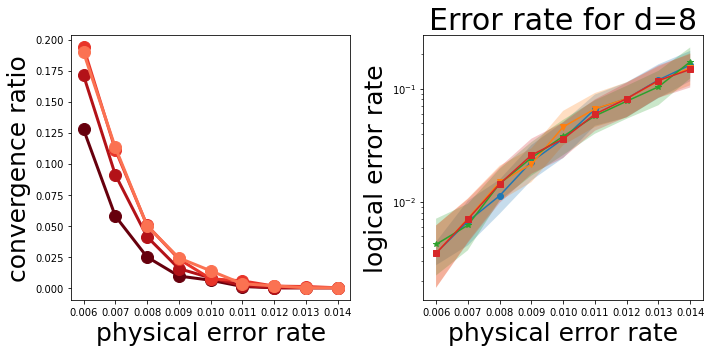

In [416]:
#create matplotlib ax
fig, ax = plt.subplots(1,2, tight_layout=True, figsize=(10,5))
plot_convergance_rate(ax[0],d8_data_samples,'Reds')
sinter.plot_error_rate(
        ax=ax[1],
        stats=samples,
        group_func=lambda stat: f"d={stat.json_metadata['bp_iters']}",
        filter_func=lambda stat: stat.json_metadata['distance'] == 8 and stat.json_metadata['bias'] == 0.5,
        x_func=lambda stat: stat.json_metadata['p'])
# change y axis to log scale
ax[1].set_yscale('log')

# add title and labels
ax[1].set_title("Error rate for d=8", fontsize=30)
ax[1].set_xlabel("physical error rate", fontsize=25)
ax[1].set_ylabel("logical error rate", fontsize=25)
ax[0].set_xlabel("physical error rate", fontsize=25)
ax[0].set_ylabel("convergence ratio", fontsize=25)


In [417]:
print(samples_hcc_bposd)

[TaskStats(strong_id='8223281405dac8823649f2f81860dd871684b41a7c2ba9877bad9ea7eb5a7a3e', decoder='bposd', json_metadata={'bias': 9999, 'bias_type': 'depolarizing_vs_y', 'bp_iters': 20, 'code': 'HoneycombCode', 'distance': 8, 'layers': 16, 'm': 0.006, 'p': 0.006, 'q': 0.0}, shots=10000, errors=35, discards=0, seconds=11547.899999999996), TaskStats(strong_id='f88824e5736d6a838ac252e801da7ca00cca2f29b350ed9878616147552d9325', decoder='bposd', json_metadata={'bias': 9999, 'bias_type': 'depolarizing_vs_y', 'bp_iters': 20, 'code': 'HoneycombCode', 'distance': 8, 'layers': 16, 'm': 0.007, 'p': 0.007, 'q': 0.0}, shots=10000, errors=41, discards=0, seconds=11716.100000000006), TaskStats(strong_id='e116e65d492726e965bbd7458452cb6ff9378ed816df46253805ad2ee4252ba6', decoder='bposd', json_metadata={'bias': 9999, 'bias_type': 'depolarizing_vs_y', 'bp_iters': 20, 'code': 'HoneycombCode', 'distance': 8, 'layers': 16, 'm': 0.009, 'p': 0.009, 'q': 0.0}, shots=5682, errors=103, discards=0, seconds=8104.9

### Bias 9999

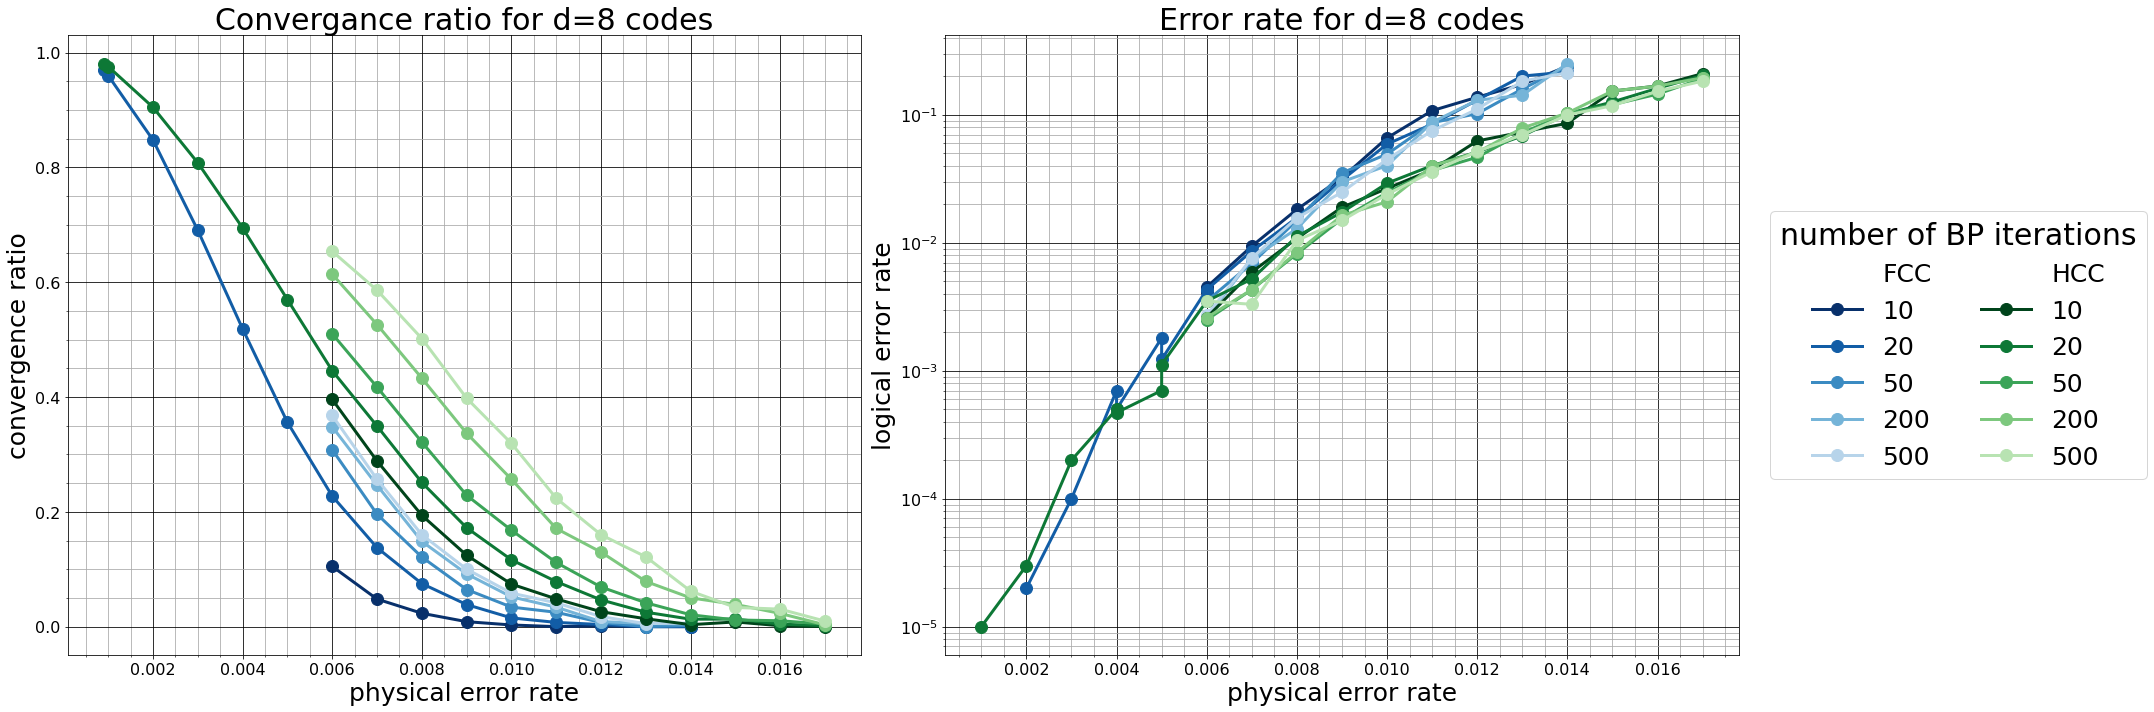

In [418]:
#create matplotlib ax
# add color map
fig, ax = plt.subplots(1,2, tight_layout=True, figsize=(30,10))
#ax[0].plot([], [], ' ', label="FCC")
plot_convergance_rate(ax[0],d8_bias9999_fcc_samples,'Blues')
#ax[0].plot([], [], ' ', label="HCC")
plot_convergance_rate(ax[0],d8_bias9999_hcc_samples, 'Greens')
ax[1].plot([], [], ' ', label="FCC")

b_colors = plt.get_cmap('Blues')(np.linspace(0.3, 1, 5))[::-1]

g_colors = plt.get_cmap('Greens')(np.linspace(0.3, 1, 5))[::-1]

r_colors = plt.get_cmap('Reds')(np.linspace(0.3, 1, 5))[::-1]

sinter.plot_error_rate(
        ax=ax[1],
        stats=samples_fcc,
        group_func=lambda stat: f"{stat.json_metadata['bp_iters']}",
        filter_func=lambda stat: stat.json_metadata['distance'] == 8 and stat.json_metadata['bias'] == 9999,
        x_func=lambda stat: stat.json_metadata['p'],
        highlight_max_likelihood_factor=1,
        plot_args_func = lambda index,curve_id: {'color': b_colors[index], 'markersize':12, 'linewidth':3, 'marker' : 'o'})

ax[1].plot([], [], ' ', label="HCC")
sinter.plot_error_rate(
        ax=ax[1],
        stats=samples_hcc,
        group_func=lambda stat: f"{stat.json_metadata['bp_iters']}",
        filter_func=lambda stat: stat.json_metadata['distance'] == 8 and stat.json_metadata['bias'] == 9999,
        x_func=lambda stat: stat.json_metadata['p'],
        highlight_max_likelihood_factor=1,
        plot_args_func = lambda index,curve_id: {'color': g_colors[index], 'markersize':12, 'linewidth':3, 'marker' : 'o'})



# change y axis to log scale
ax[1].set_yscale('log')

# add title and labels
#ax[0].set_title("Convergance ratio for different number of BP iterations", fontsize=30)
#ax[1].set_title("Error rate for d=8", fontsize=30)
ax[1].set_xlabel("physical error rate", fontsize=25)
ax[1].set_ylabel("logical error rate", fontsize=25)
ax[0].set_xlabel("physical error rate", fontsize=25)
ax[0].set_ylabel("convergence ratio", fontsize=25)

ax[1].legend(bbox_to_anchor=(1.04, 0.5), title='number of BP iterations',loc="center left", borderaxespad=0, prop={'size':25}, title_fontsize=30, ncol=2)

ax[0].set_title("Convergance ratio for d=8 codes", fontsize=30)
ax[1].set_title("Error rate for d=8 codes", fontsize=30)
for a in ax:
    a.grid(which='minor', color='#AAAAAA')
    a.grid(which='major', color='black')
    a.minorticks_on()
    a.tick_params(axis='both', which='major', labelsize=16)


Comparison BPOSD and Beliefmatching

Text(0.5, 1.0, 'Comparison of belief-matching and BPOSD')

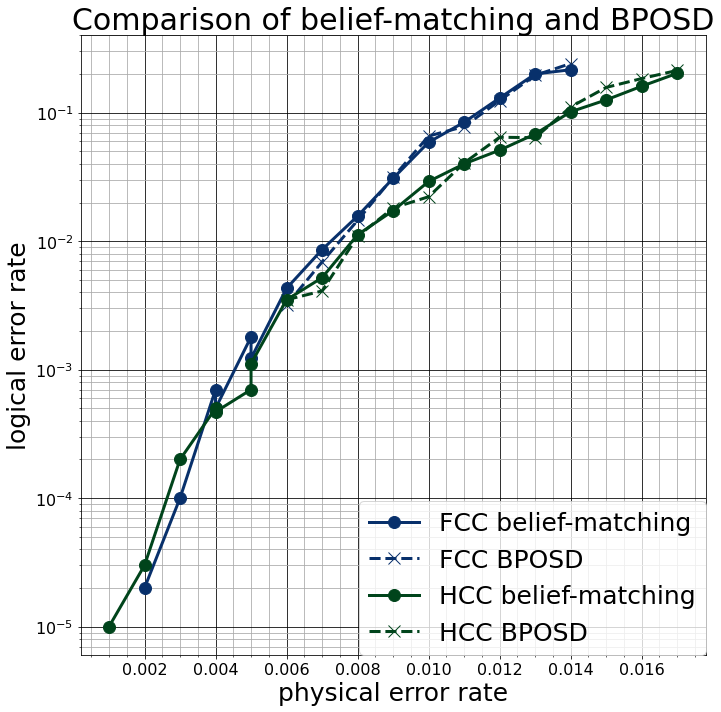

In [419]:
fig, ax = plt.subplots(1,1, tight_layout=True, figsize=(10,10))


sinter.plot_error_rate(
        ax=ax,
        stats=samples_fcc,
        filter_func=lambda stat: stat.json_metadata['distance'] == 8 and stat.json_metadata['bias'] == 9999 and stat.json_metadata['bp_iters'] == 20,
        x_func=lambda stat: stat.json_metadata['p'],
        highlight_max_likelihood_factor=1,
        plot_args_func = lambda index,curve_id: {'color': b_colors[index], 'markersize':12, 'linewidth':3, 'marker' : 'o', 'label': 'FCC belief-matching'})

sinter.plot_error_rate(
        ax=ax,
        stats=samples_fcc_bposd,
        filter_func=lambda stat: stat.json_metadata['distance'] == 8 and stat.json_metadata['bias'] == 9999 and stat.json_metadata['bp_iters'] == 20,
        x_func=lambda stat: stat.json_metadata['p'],
        highlight_max_likelihood_factor=1,
        plot_args_func = lambda index,curve_id: {'color': b_colors[index], 'markersize':12, 'linewidth':3, 'marker' : 'x', 'linestyle': '--', 'label': 'FCC BPOSD'})

#ax.plot([], [], ' ', label="HCC")
sinter.plot_error_rate(
        ax=ax,
        stats=samples_hcc,
        filter_func=lambda stat: stat.json_metadata['distance'] == 8 and stat.json_metadata['bias'] == 9999 and stat.json_metadata['bp_iters'] == 20,
        x_func=lambda stat: stat.json_metadata['p'],
        highlight_max_likelihood_factor=1,
        plot_args_func = lambda index,curve_id: {'color': g_colors[index], 'markersize':12, 'linewidth':3, 'marker' : 'o', 'label': 'HCC belief-matching'})

sinter.plot_error_rate(
        ax=ax,
        stats=samples_hcc_bposd,
        group_func=lambda stat: f"{stat.json_metadata['bp_iters']}",
        filter_func=lambda stat: stat.json_metadata['distance'] == 8 and stat.json_metadata['bias'] == 9999 and stat.json_metadata['bp_iters'] == 20,
        x_func=lambda stat: stat.json_metadata['p'],
        highlight_max_likelihood_factor=1,
        plot_args_func = lambda index,curve_id: {'color': g_colors[index], 'markersize':12, 'linewidth':3, 'marker' : 'x', 'linestyle': '--', 'label': 'HCC BPOSD'})

ax.grid(which='minor', color='#AAAAAA')
ax.grid(which='major', color='black')
ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=16)
ax.legend(loc="lower right", borderaxespad=0, prop={'size':25}, title_fontsize=30)
ax.set_yscale('log')
# set x and y labels on ax
ax.set_xlabel("physical error rate", fontsize=25)
ax.set_ylabel("logical error rate", fontsize=25)
ax.set_title("Comparison of belief-matching and BPOSD", fontsize=30)

